# Tarefa 5 - Francisco José Santos de Oliveira - 119150156

## Importações

In [21]:
using Plots
using Polynomials
using LinearAlgebra

In [2]:
# Função de Vandermonde e Regressão da Tarefa Passada:

function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

function regressão(x,y,grau)
    V=vandermonde(x,y,grau)
    c=V\y #mínimos quadrados
    return c
end

# Função de Interpolação da tarefa retrasada:

function interpolação(x, y)
   
    #criar a matriz de Vondermonde
    V=[x.^0 x.^1 x.^2]
    #resolver o sistema linear Vc=y
    c=V\y
    
    return c #vetor de coeficientes
end

# Funções de Integral da Aula 18

function trapezio(f,a,b,n) #calcular a integral f(x) de a até b
    h=(b-a)/n
    S=0.0
    for i=1:(n-1)  #calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S
end

#calcular a integral f(x) de a até b com erro menor que tol
# f''(x) <= M para todo a<=x<=b 
function trapezio2(f, a, b, tol, M) 
    n=ceil(sqrt(((b-a)^3*M)/(12*tol)))
    h=(b-a)/n
    S=0.0
    for i=1:(n-1)  #calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S
end

function Integral_Dupla(h,a,b,c,d,n) #integral dupla de h(x,y) de a até b no x e de c até d no y (adicionei n para adaptar)
    function g(y)
        f(x)=h(x,y)
        return trapezio(f,a,b,n)
    end
    return trapezio(g,c,d,n)
end

Integral_Dupla (generic function with 1 method)

## Questão 1

Primeiramente, é necessário "transportar o mundo real para o mundo barra":

Mundo Real: $$T(x) = c0*x^{c1}$$

$$y = c0*x^{c1}$$
$$ln(y) = ln(c0*x^{c1})$$
$$ln(y) = ln(c0) + ln(x^{c1})$$
Mundo Barra: $$ln(y) = ln(c0) + c1 * ln(x)$$

Agora que já podemos determinar x_barra e y_barra, vamos antes introduzir os dados da questão:

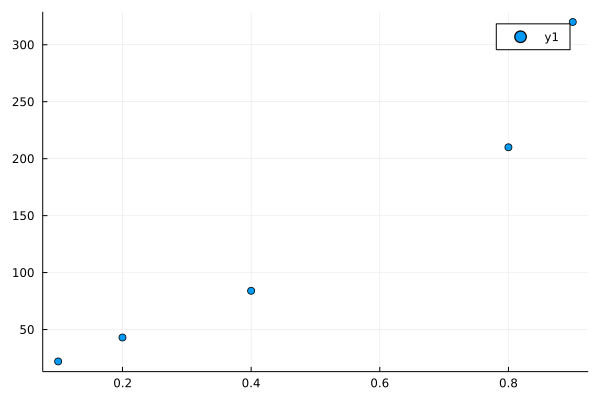

In [3]:
x = [0.1,0.2,0.4,0.8,0.9]
y = [22,43,84,210,320]
x_barra = log.(x)
y_barra = log.(y)
scatter(x,y)

Para finalizar então, realizamos a regressão do mundo barra, fazemos a "tradução" de volta para o real, e plotamos a curva:

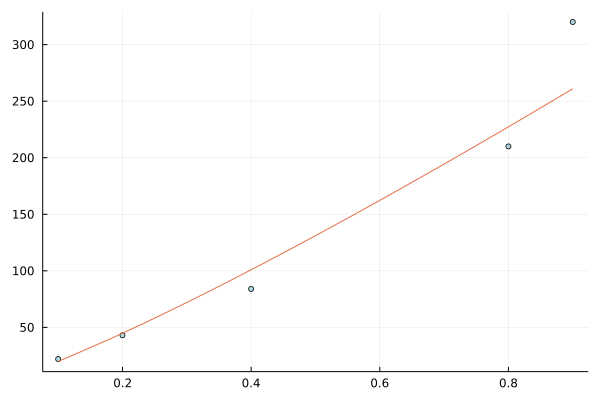

In [4]:
c_barra = regressão(x_barra,y_barra,1)
c0 = exp(c_barra[1])
c1 = c_barra[2]
t(x) = c0 * x^(c1)
scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(t)

Por fim, aplicamos x = 0.3 para obter encontra o que foi solicitado no enunciado.

In [5]:
t(0.3)

72.06116619893652

Considerando apenas as 3 casas decimais, a resposta final é 72.061.

## Questão 2

### Item A

Implementamos, primeiramente, o método dos trapézios:

In [6]:
function Trapézios(x,y)
    #onde n é a quantidade de pontos 
    n=length(x)
    
    #vamos começar inicializando a variável da área que receberá o resultado da integral
    Área = 0
    
    #criação de um loop para processar cada função
    for i=1:n-1
        #preparação dos dados que serão inseridos na interpolação
        x_pontos = [x[i],x[i+1]]
        y_pontos = [y[i],y[i+1]]
        
        f=Polynomial(interpolação(x_pontos,y_pontos))

        #incremento do total da área com cada integral de função linear feita
        Área += ((x[i+1]-x[i])/2)*(f(x[i+1])+f(x[i]))
    end
    return Área
end

Trapézios (generic function with 1 method)

Com o método implementado, introduzimos os valores dados pela questão para encontrar a altura atingida pelo endeavour após 125s:

In [7]:
x=[0, 10, 15, 20, 32, 59, 62, 125]
y=[0, 185, 319, 447, 742, 1325, 1445, 4151]

8-element Vector{Int64}:
    0
  185
  319
  447
  742
 1325
 1445
 4151

Finalmente, executamos o algoritmo criado para obter a resposta pedida:

In [8]:
Trapézios(x,y)

219567.49999999994

Portanto, a altura atingida em t=125s é de 219567.49999999994 pés.

### Item B

Vamos dar uma olhada na fórmula para estimativa do erro:

$$\frac{h^{3}*N*M}{12},$$

onde $h$ é o valor de cada intervalo, $n$ é a quantidade de intervalos e $M$ o maior valor da segunda derivada possível entre os valores em análise.

Precisaríamos dos M's de cada intervalo para que fosse possível estimar o teto do erro, uma vez que ele se faz presente na fórmula. 

### Item C

Façamos a regressão dos pontos dados e colocamos os coeficientes encontrados no formato da função dado pelo enunciado:

In [27]:
o=regressão(x,y,1)
f(x)=x*o[2] + o[1]

f (generic function with 2 methods)

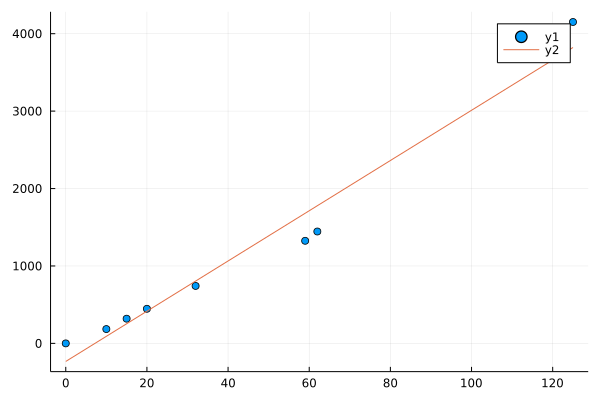

In [28]:
scatter(x,y)
plot!(f)

Agora, finalizamos com uma função para o cálculo da área. É importante considerar que estamos tratando de um único trapézio, não vários. Isso será recompensador, em termos de gastos computacionais.

In [65]:
((125)/2)*(f(125)+f(0))

224307.6085907594

A altura estimada por este outro método foi de 224307.6085907594 pés.

## Questão 3

### Item A

Vamos adaptar a equação para poder calcular a sua área
$$x^{2} + y^{2} = 1$$
$$y^{2} = 1 - x^{2}$$
$$y = \pm\sqrt{1 - x}$$

Vamos observar o que acabamos de obter:

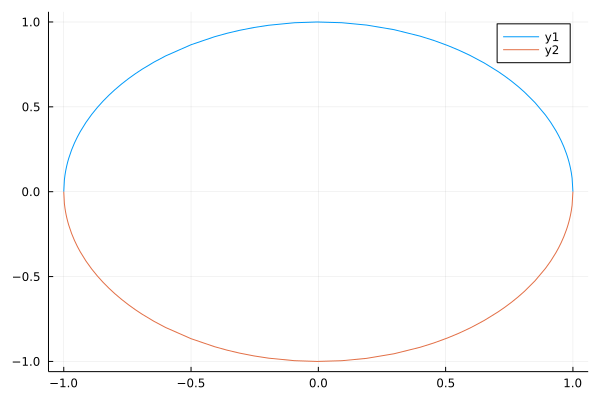

In [14]:
j(x)=sqrt(1-x^2)
i(x)=-sqrt(1-x^2)
plot(j)
plot!(i)

Percebemos então que cada raiz dessa equação representa um semicírculo. Dessa forma, iremos pegar o j(x), por se tratar da parte que contém o primeiro quadrante. Em seguida, irei delimitar por meio dos limites de integração (entre 0 e 1) para obter a área somente desse quadrante. Lembrando ainda que precisamos usar h = 0.1, isto é, o parâmetro n precisará ser 10 para que esse valor de h aconteça.

In [15]:
quadrante = trapezio(j,0,1,10)

0.7761295815620796

Como isso é $\frac{1}{4}$ do círculo, irei multiplicar por 4 para obter uma estimativa para a área total:

In [16]:
quadrante * 4

3.1045183262483182

Portanto, o resultado da nossa estimativa para $\pi$ foi 3.1045183262483182

### Item B

Vamos tentar calcular a segunda derivada da função do semicírculo superior para poder encontrar M.

Pegamos então
$$ (\sqrt{1-x^{2}})' = -\frac{x}{\sqrt{1-x^{2}}} $$

Vamos para a segunda derivada:
$$ (-\frac{x}{\sqrt{1-x^{2}}})' = -\frac{1}{(1-x^{2})^{3/2}} $$

Agora que temos, será necessário analisar o intervalo do primeiro quadrante: 0 e 1. No entanto, notamos um problema envolvendo x=1, pois teríamos a derivada indo para infinito superiormente. Ou seja, não teríamos como limitar o M.

## Questão 4

Vamos implementar alguma coisa para teste:

In [17]:
f(x,y) = x^2 + y^2
f2(y) = y - 9
f3(y) = y + 9
c = 0
d = 10

10

In [18]:
Integral_Dupla(f,a,b,h,g,1000)

LoadError: UndefVarError: a not defined

Notamos então um erro de tipo no momento em que é feito o cálculo do h, na subtração de a e b. No caso em questão, estaríamos realizando uma operação de subtração entre duas funções, algo que não faz sentido para o Julia. É necessário encontrar uma maneira de converter a função para uma equação, assim tornando a operação viável. 

In [22]:
function Integral_Dupla_Questão4(h,a,b,c,d,n) #integral dupla de h(x,y) de a até b no x e de c até d no y 
    function g(y)
        f(x)=h(x,y)
        return trapezio(f,a(y),b(y),n) #aplicamos o y na substituição de variável para se tornar uma equação dependente de y, que será modificada no trapézio abaixo
    end
    return trapezio(g,c,d,n)
end

Integral_Dupla_Questão4 (generic function with 1 method)

In [25]:
Integral_Dupla_Questão4(f,f2,f3,c,d,1000)

16860.015719999996

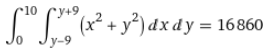

Como foi verificado, o resultado se assemelha bastante com a resposta. A diferença diminui conforme o n aumenta.